In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import seaborn as sns

In [8]:
df = pd.read_csv('superclean.csv')

In [9]:
df.head()

,user_id,duration,lat,long
0,edbc54bddf16494a49f39ac057b4185d,47.0,31.237872,121.470259
1,f8206ab58b9bdb070673f7050242e9ee,108.0,31.237872,121.470259
2,f8206ab58b9bdb070673f7050242e9ee,179.0,31.237872,121.470259
3,f8206ab58b9bdb070673f7050242e9ee,28.0,31.237872,121.470259
4,f8206ab58b9bdb070673f7050242e9ee,179.0,31.237872,121.470259


In [11]:
df['lat']=pd.to_numeric(df['lat'])
df['lat'].dtype
df['long']=pd.to_numeric(df['long'])

### remove outliers

In [13]:
df=df.drop(df.loc[df['long']>122].index)
df=df.drop(df.loc[df['long']<120].index)
df=df.drop(df.loc[df['lat']>32].index)
df=df.drop(df.loc[df['lat']<30].index)

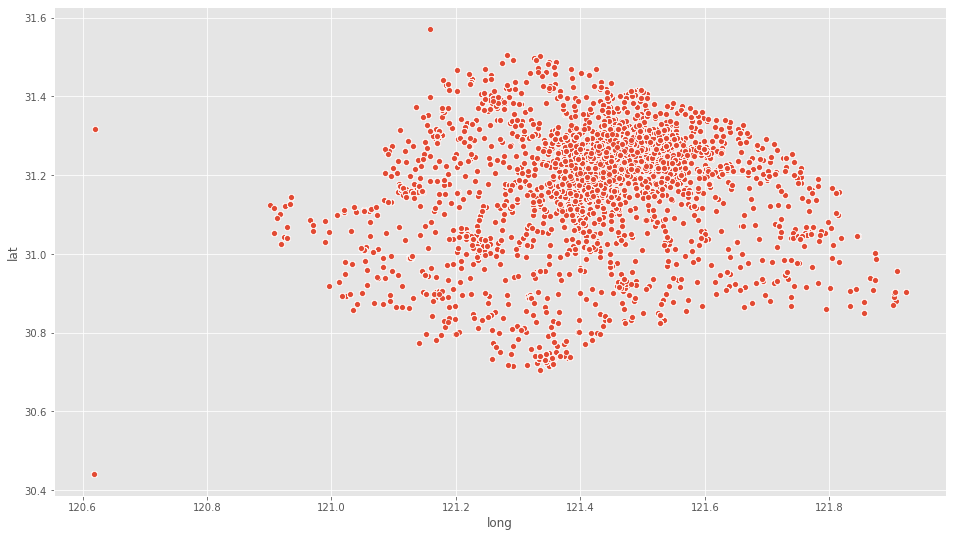

In [20]:
ax = sns.scatterplot(x="long", y="lat", data=df)

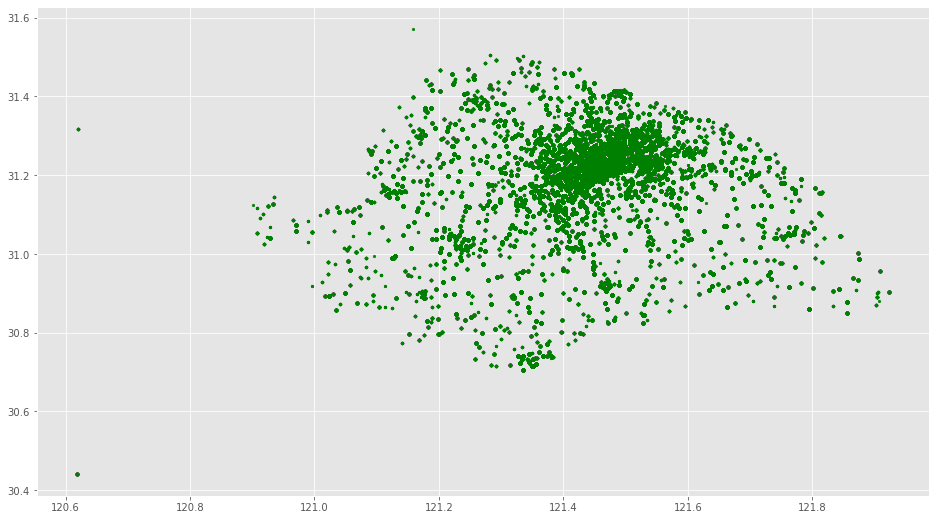

In [21]:
#
# Plot
plt.scatter(df['long'], df['lat'], c='green', s=7)

In [24]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [26]:
y_predicted = km.fit_predict(df[['long','lat']])
y_predicted

array([0, 0, 0, ..., 3, 3, 3])

In [27]:
df['cluster'] = y_predicted

In [28]:
df.head()

,user_id,duration,lat,long,cluster
0,edbc54bddf16494a49f39ac057b4185d,47.0,31.237872,121.470259,0
1,f8206ab58b9bdb070673f7050242e9ee,108.0,31.237872,121.470259,0
2,f8206ab58b9bdb070673f7050242e9ee,179.0,31.237872,121.470259,0
3,f8206ab58b9bdb070673f7050242e9ee,28.0,31.237872,121.470259,0
4,f8206ab58b9bdb070673f7050242e9ee,179.0,31.237872,121.470259,0


In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

In [31]:
km.cluster_centers_

array([[121.48500832,  31.26528911],
       [121.32322771,  31.19230609],
       [121.32361955,  30.94687383],
       [121.65703683,  31.10142893]])

Text(0, 0.5, 'lat')

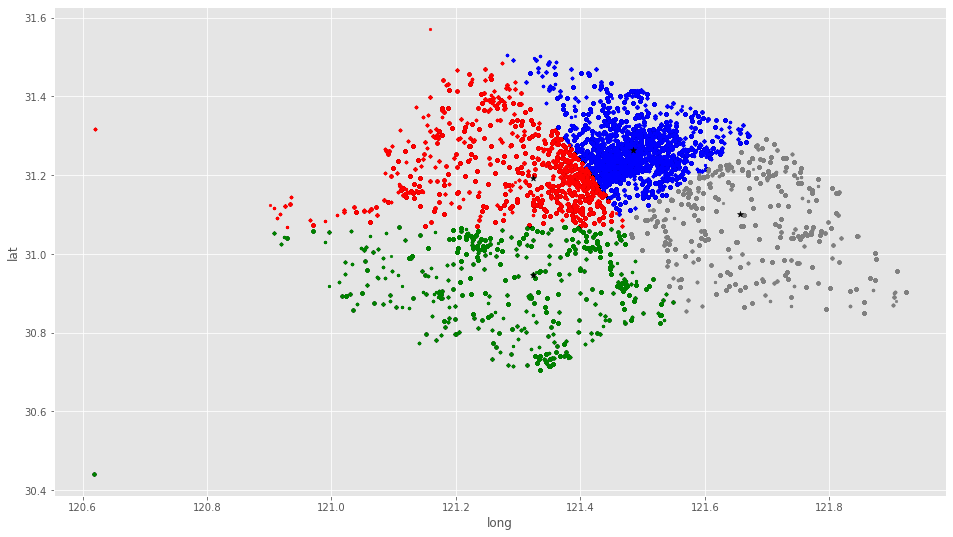

In [38]:
plt.scatter(df1['long'], df1['lat'], c='blue', s=7)
plt.scatter(df2['long'], df2['lat'], c='red', s=7)
plt.scatter(df3['long'], df3['lat'], c='green', s=7)
plt.scatter(df4['long'], df4['lat'], c='grey', s=7)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*',s=40)
plt.xlabel('long')
plt.ylabel('lat')

### elbow method

In [39]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['long', 'lat']])
    sse.append(km.inertia_)

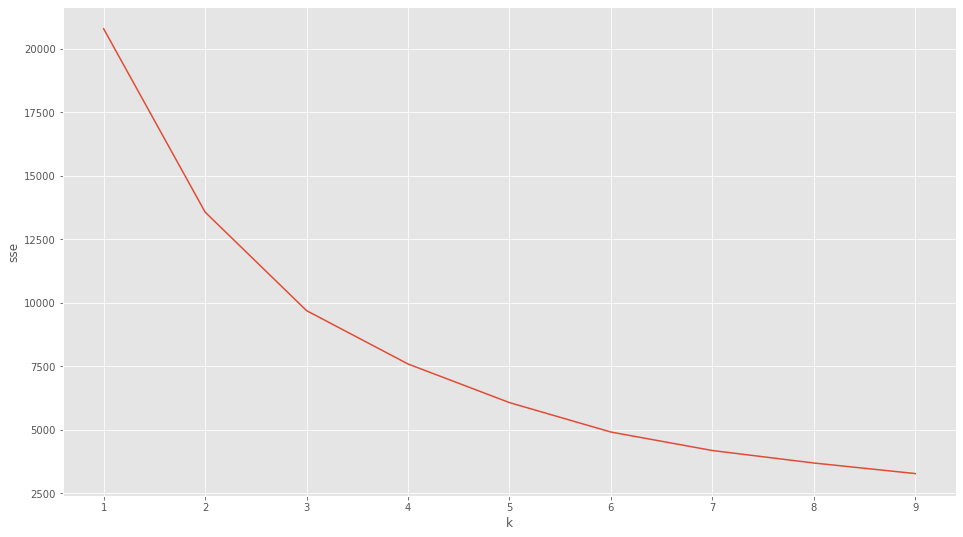

In [43]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)